In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris=sns.load_dataset('iris')
X=iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=13)

# KNeighborsClassifer
* n_neighbors : neighbor의 크기 설정. defalut=5.
* weights : neighbor를 구할 때 사용할 weight 설정. 'uniform', 'distance'가 있으며 default='uniform'.
* algorithm : neighbor를 구할 때 사용할 알고리즘 설정. 'auto', 'ball_tree', 'kd_tree', 'brute'가 있다.
* leaf_size : 'ball_tree', 'kd_tree' 알고리즘에서 leaf size 설정.
* p : Minkowski 거리에서의 p 설정. p=2이면 Euclidean distance이다.
* metric : 거리를 구할 때 사용할 metric 설정. default='minkowski'.

In [3]:
# n에 따른 정확도 비교. metric은 모두 minkowski metric.
for n in range(2,10,3):
    knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
    knn.fit(X_train, y_train)
    y_test_pred=knn.predict(X_test)
    print('n={} : {}'.format(n,accuracy_score(y_test, y_test_pred)))

n=2 : 0.9555555555555556
n=5 : 0.9333333333333333
n=8 : 0.9777777777777777


In [4]:
# weight에 따른 정확도 비교.
for wt in ['uniform','distance']:
    knn = KNeighborsClassifier(n_neighbors=5, weights=wt)
    knn.fit(X_train, y_train)
    y_test_pred=knn.predict(X_test)
    print('{} : {}'.format(wt,accuracy_score(y_test, y_test_pred)))

uniform : 0.9111111111111111
distance : 0.9333333333333333


In [5]:
# algorithm에 따른 정확도 비교.
for alg in ['auto','ball_tree','kd_tree','brute']:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=alg)
    knn.fit(X_train, y_train)
    y_test_pred=knn.predict(X_test)
    print('{} : {}'.format(alg,accuracy_score(y_test, y_test_pred)))

auto : 0.9111111111111111
ball_tree : 0.9111111111111111
kd_tree : 0.9111111111111111
brute : 0.9333333333333333


# KernelDensity
* bandwidth : 각 kernel의 대역폭. 작을수록 뾰족한 형태, 클수록 완만한 형태.
* algorithm : 사용할 알고리즘 설정. 'kd_tree', 'ball_tree' ,'auto'가 있다.
* kernel : 사용할 커널 설정.
    * 'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine' 이 있다.
* metric : 사용할 metric 설정. 알고리즘 별로 valid한 metric을 사용해야 한다.

In [6]:
xx=X['sepal_length'].values.T.reshape(-1,1)
xx_d = np.linspace(3.5, 8.5, 1000)

In [7]:
# metric은 모두 euclidean metric.
kde_2 = KernelDensity(bandwidth=0.2,kernel='gaussian')
kde_1 = KernelDensity(bandwidth=1,kernel='gaussian')

kde_top = KernelDensity(bandwidth=0.2,kernel='tophat')
kde_epa = KernelDensity(bandwidth=0.2,kernel='epanechnikov')

In [8]:
kde_2.fit(xx); logprob_2=kde_2.score_samples(xx_d.reshape(-1, 1))
kde_1.fit(xx); logprob_1=kde_1.score_samples(xx_d.reshape(-1, 1))

kde_top.fit(xx); logprob_top=kde_top.score_samples(xx_d.reshape(-1, 1))
kde_epa.fit(xx); logprob_epa=kde_epa.score_samples(xx_d.reshape(-1, 1))

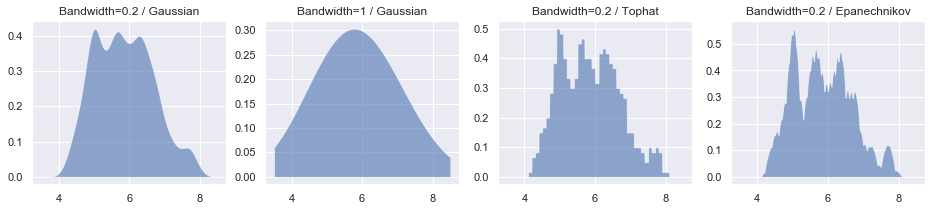

In [9]:
sns.set()
plt.figure(figsize=(16,3))

plt.subplot(1,4,1)
plt.fill_between(xx_d, np.exp(logprob_2),alpha=0.6)
plt.title('Bandwidth=0.2 / Gaussian')

plt.subplot(1,4,2)
plt.fill_between(xx_d, np.exp(logprob_1),alpha=0.6)
plt.title('Bandwidth=1 / Gaussian')

plt.subplot(1,4,3)
plt.fill_between(xx_d, np.exp(logprob_top),alpha=0.6)
plt.title('Bandwidth=0.2 / Tophat')

plt.subplot(1,4,4)
plt.fill_between(xx_d, np.exp(logprob_epa),alpha=0.6)
plt.title('Bandwidth=0.2 / Epanechnikov')

plt.show()